In [1]:
library("mclust")
library("pepXMLTab")

Package 'mclust' version 5.1
Type 'citation("mclust")' for citing this R package in publications.


In [ ]:
tt <- "/data/promec/testR/b1947_293T_proteinID_11B_QE3_122212.pep.xml"
tttt <- pepXML2tab(tt)
tttt[1,]
hist(as.numeric(tttt$massdiff))
passed <- PSMfilter(tttt, pepFDR = 0.01, scorecolumn = 'spscore', hitrank = 1,minpeplen = 6, decoysuffix = '_REVERSED')
passed[1, ]
mdiff = as.numeric(passed$precursor_neutral_mass) - as.numeric(passed$calc_neutral_pep_mass)
dhist = hist(mdiff)
warnings()
hist(log10(dhist$density))
max(log10(dhist$density))
mod4 = densityMclust(mdiff)
mod4$parameters$mean
summary(mod4)
plot(mod4, what = "BIC")
plot(mod4, what = "density")
plot(mod4, what = "diagnostic", type = "qq")
wtf = paste0(tt,"mu.txt")
write.table(mod4$parameters, wtf,sep = "\t")


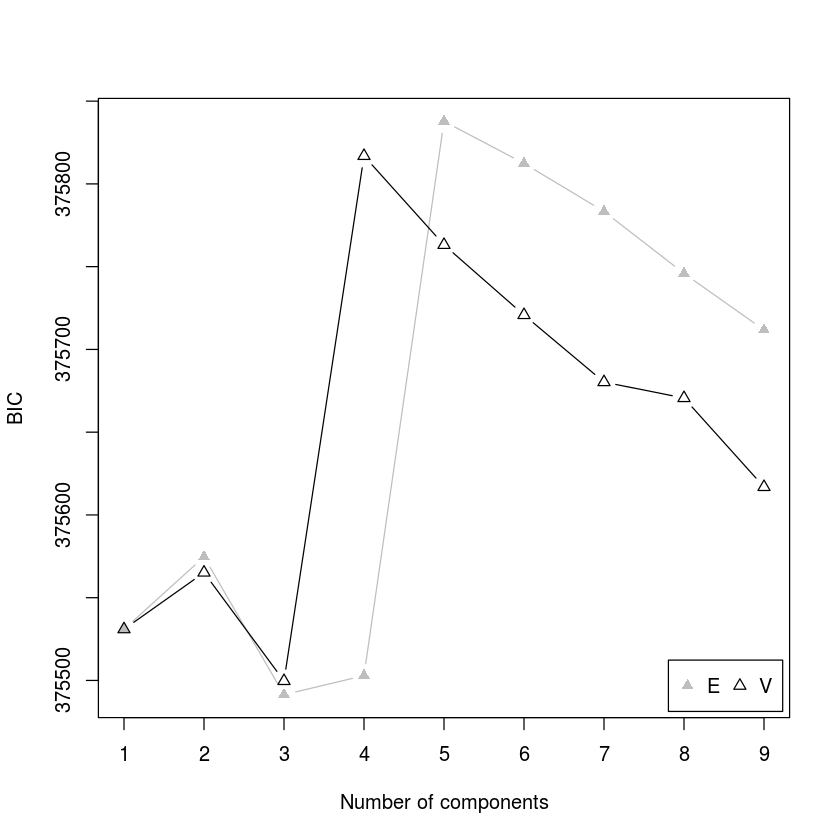

In [3]:
plot(mod4, what = "BIC")